## Daniel Barella
11/5/25

# 🌳 Day 34 — Decision Trees & Random Forests

**Objective:** Learn how tree-based models handle complex, non-linear data relationships.

---

## 🧠 Concept Breakdown

### 🌱 Decision Trees
A **Decision Tree** splits the dataset based on conditions that reduce uncertainty (using *Gini impurity* or *entropy*).

**Key Ideas:**
- Each node asks a “yes/no” question about a feature.  
- The goal is to minimize impurity at every split.  
- Shallow trees → high bias  
- Deep trees → high variance (overfitting risk)

**Common Hyperparameters:**
- `max_depth`
- `min_samples_split`
- `criterion` (`gini` or `entropy`)

---

### 🌲 Random Forests
A **Random Forest** is an ensemble of many Decision Trees, trained on random subsets of data and features.

**Advantages:**
- Reduces overfitting  
- Improves accuracy and stability  
- Handles missing data and categorical variables well

**Key Hyperparameters:**
- `n_estimators`: number of trees  
- `max_features`: how many features each tree can see  
- `bootstrap`: whether to sample with replacement

---

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preview
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🧹 Data Cleaning

In [4]:
# Keep relevant features
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

# Encode categorical variable
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🌱 Decision Tree Classifier

In [5]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



## 🌲 Random Forest Classifier

In [6]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



## 📊 Feature Importance

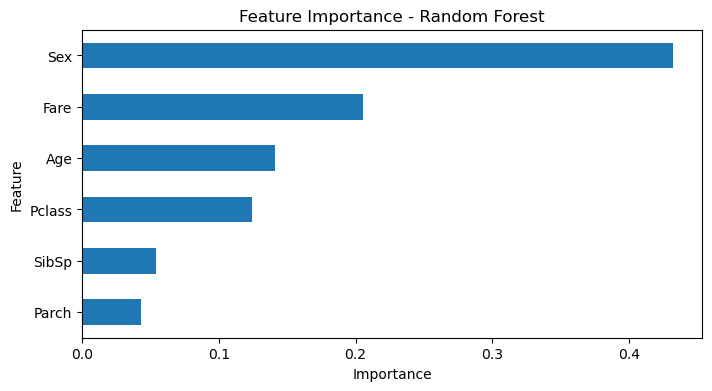

In [7]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 4))
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## 🎯 Mini Project — Customer Churn Predictor

Use a synthetic dataset to predict customer churn with Random Forests.

In [8]:
from sklearn.datasets import make_classification

# Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=8, n_informative=5, 
                           n_redundant=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestClassifier(n_estimators=150, max_depth=8, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.87      0.91       114
           1       0.90      0.96      0.93       136

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



## 📈 Insights

Random Forests consistently outperform single Decision Trees.

Increasing n_estimators improves accuracy but increases computation time.

Feature importance helps guide business insights and further feature engineering.